# Matplotlib Part 2

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Before using this notebook, we need to make sure `netCDF4` is installed in your current environment. We hopefully took care of this on day one of class, but if you are having issues running the cell below, let us know.

In [2]:
from netCDF4 import Dataset as netcdf_dataset

### Plotting Errorbars

In many (most?) scientific applications it essential to keep track of uncertainties in measurements or estimates. We can use `errorbar` plots to help out. 

Note that in the examples below we have symmteric and fixed errors for all measurements, but `matplotlib` gives you the flexibility to have these change for all measurements. 

In [3]:
# Generate some data
x = np.linspace(0, 10, 50) 
y = np.sin(x) + 0.8 * np.random.randn(50)

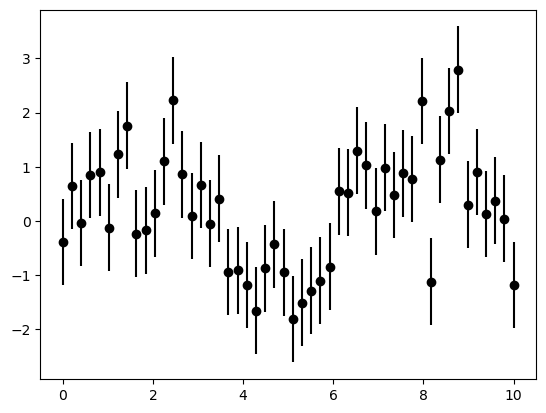

In [4]:
# Plot errorbars for an fixed error of 0.8
plt.errorbar(x, y, yerr=0.8, fmt='ok'); # Black error bars, with a circle at center

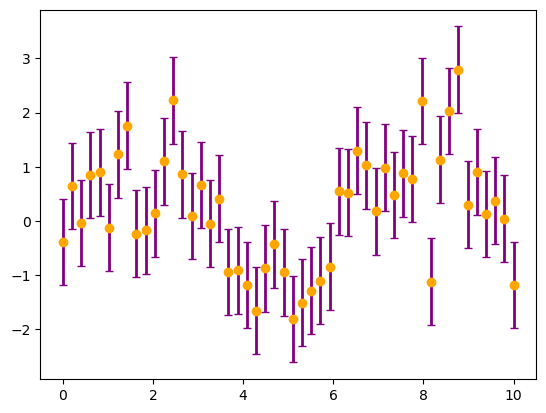

In [5]:
# Set color of symbols and lines, and include a 'cap'
plt.errorbar(x, y, yerr=0.8, fmt='o', color='orange',
             ecolor='purple', elinewidth=2, capsize=3); 

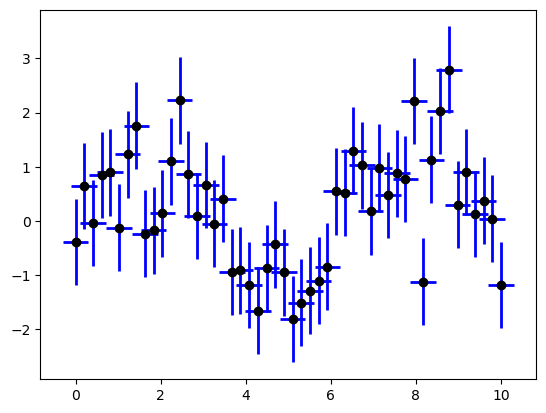

In [6]:
# We can have error bars in the x-direction too
plt.errorbar(x, y, xerr=0.3, yerr=0.8, fmt='o', color='black',
             ecolor='blue', elinewidth=2, capsize=0); 

### Histograms 

We saw in a previous lecture how histograms can be used to visualize distributions of data. They are very useful in a range of applications and `plt.hist()` has many options to check out. 

In [7]:
# Generate some data
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

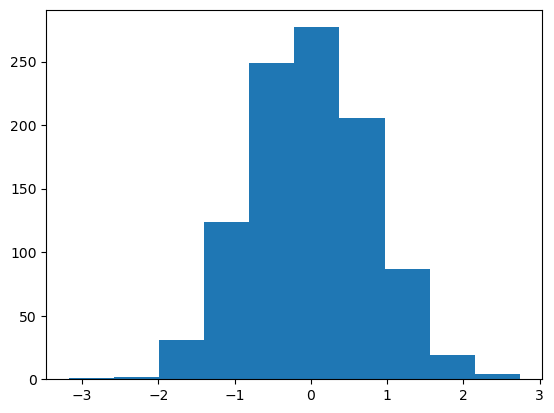

In [8]:
# default plot is kinda klunky
plt.hist(x1); 

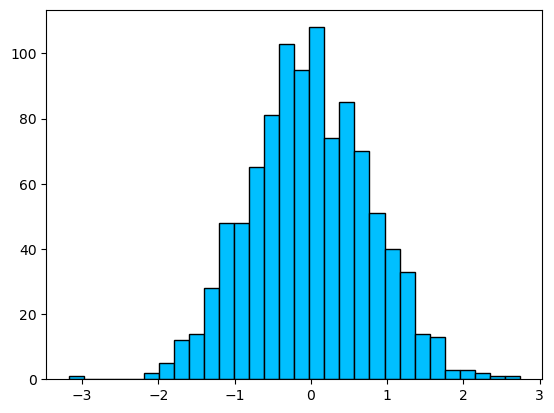

In [9]:
# customizing histograms is usually worth the effort
plt.hist(x1, bins=30, histtype='bar', color='deepskyblue', edgecolor='black');

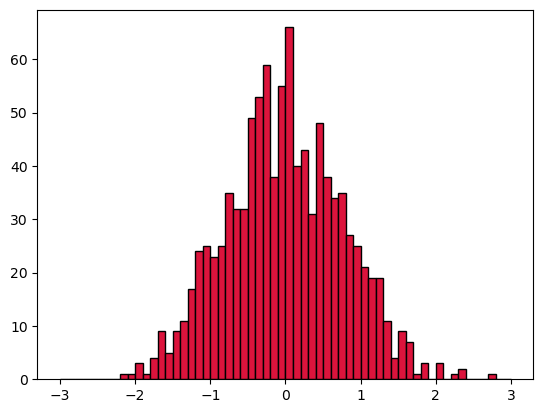

In [10]:
# We can also specify the bin edges manually
binE = np.linspace(-3.0, 3.0, 61) # 0.1 unit spacing
plt.hist(x1, bins=binE, histtype='bar', color='crimson', edgecolor='black');

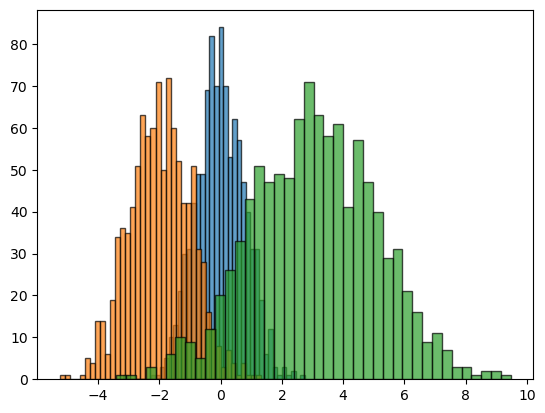

In [11]:
# We can put multiple histograms on the same plot
plt.hist(x1, bins=40, alpha=0.7, edgecolor="k"); # alpha controls transparency
plt.hist(x2, bins=40, alpha=0.7, edgecolor="k");
plt.hist(x3, bins=40, alpha=0.7, edgecolor="k");

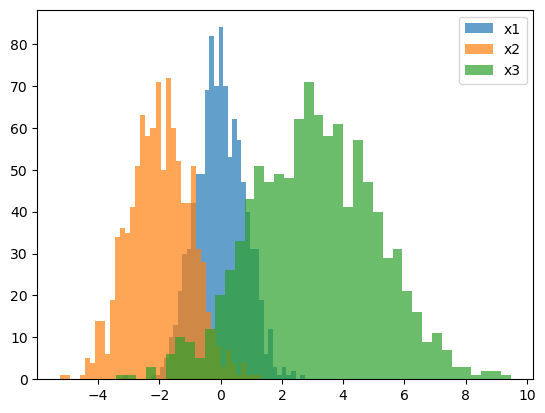

In [12]:
# And add a legend
plt.hist(x1, bins=40, alpha=0.7, label='x1')
plt.hist(x2, bins=40, alpha=0.7, label='x2')
plt.hist(x3, bins=40, alpha=0.7, label='x3')
plt.legend(loc='best');

### Pie charts

In [13]:
# We will practice using the grade breakdown for this class
labels = 'In-Class Exercises', 'Homeworks', 'Final Project'
sizes = [40, 40, 20]

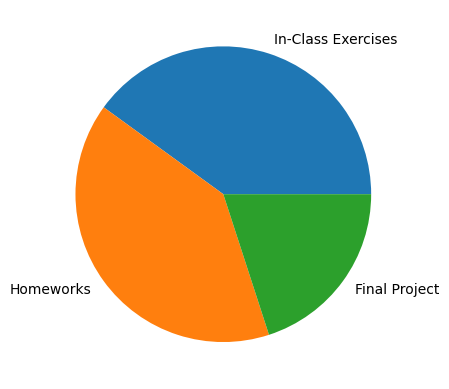

In [14]:
# Simple pie chart
plt.pie(sizes, labels=labels);

#### Show the percentages

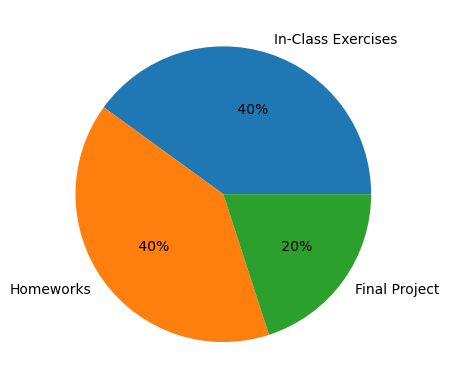

In [15]:
# add in the values
plt.pie(sizes, labels=labels, autopct='%3.0f%%'); # %3.0f is a string format

#### Set the start angle

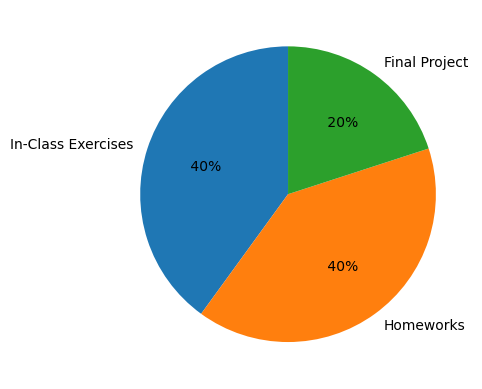

In [16]:
# this rotates the default pie CCW from x-axis
plt.pie(sizes, labels=labels, autopct='%3.0f%%', startangle=90);

#### Set the colors

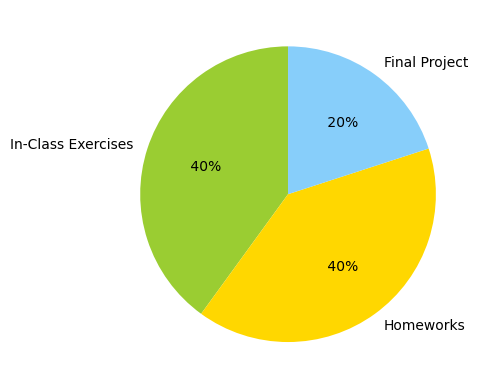

In [17]:
# color the pie by hand
colors = ['yellowgreen', 'gold', 'lightskyblue']
plt.pie(sizes, labels=labels, autopct='%3.0f%%', startangle=90, colors=colors);

#### Adjust text properties

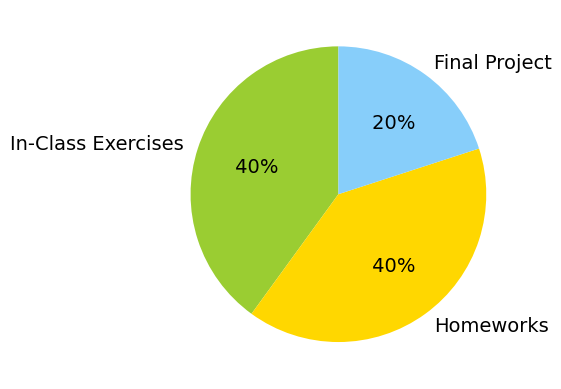

In [18]:
# makes it easier to read
colors = ['yellowgreen', 'gold', 'lightskyblue']
plt.pie(sizes, labels=labels, autopct='%3.0f%%', startangle=90, 
       colors=colors, textprops={"fontsize": 14});

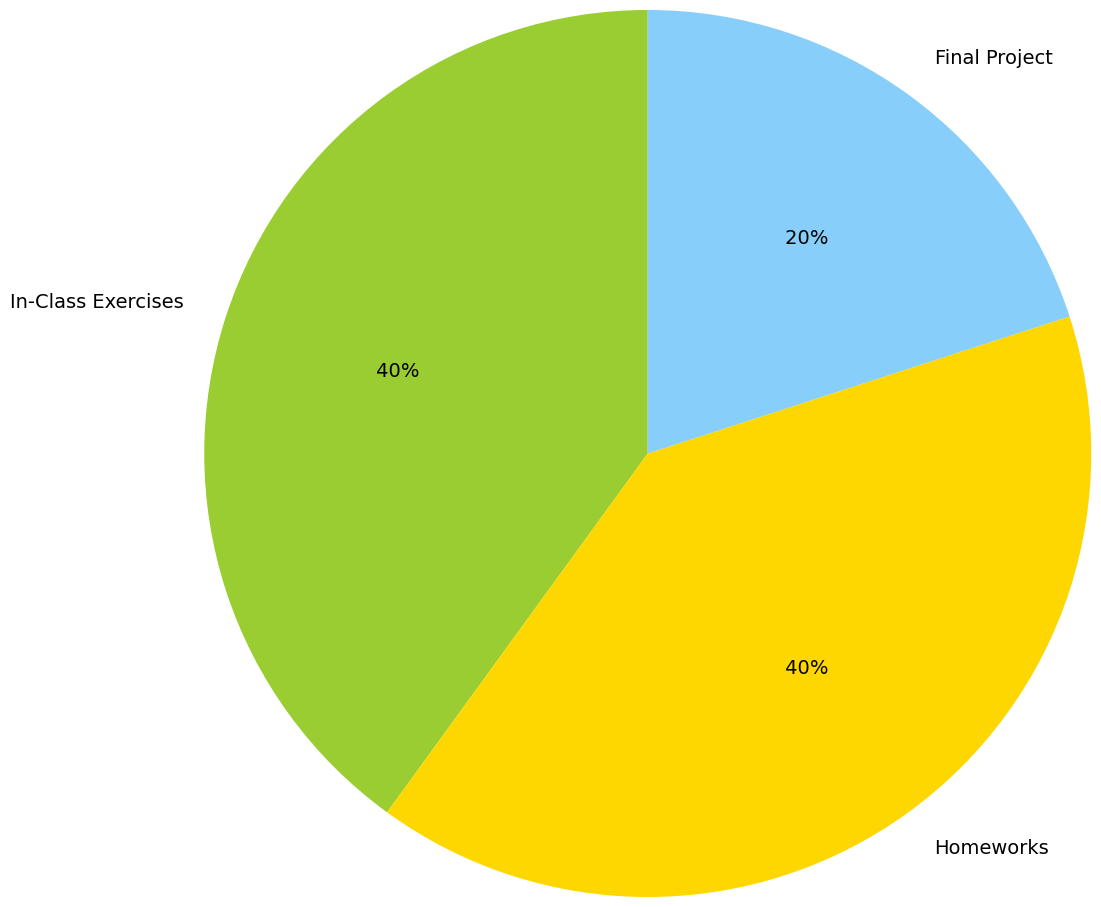

In [19]:
# a bigger pie!
colors = ['yellowgreen', 'gold', 'lightskyblue']
plt.pie(sizes, labels=labels, autopct='%3.0f%%', startangle=90, 
       colors=colors, textprops={"fontsize": 14}, radius=3);

---

### NetCDF (Network Common Data Form) is a file format for storing multidimensional scientific data (variables).

There are 2 main types of netcdf files that I've enountered - we'll look at them both. You can create your own netCDF files of topography using a number of public databases, e.g.: https://www.gmrt.org/GMRTMapTool/

If you work a lot with netCDF data, you may wish to check out the `xarray` package, which is bit more sophisticated but also more powerful: https://docs.xarray.dev/en/stable/

In [20]:
# Import the data
topo_grid = netcdf_dataset('lecture13_topo_gom.grd') 

In [21]:
# What is the type?
print(type(topo_grid))

<class 'netCDF4._netCDF4.Dataset'>


In [22]:
# What are the arrays in the file?
topo_grid.variables.keys()

dict_keys(['x', 'y', 'z'])

In [23]:
# What are the dimensions of the grid?
topo_grid.dimensions

{'x': <class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 2401,
 'y': <class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 1561}

In [24]:
# Extract the grid variables into numpy arrays
xtopo = np.asarray(topo_grid.variables['x'])
ytopo = np.asarray(topo_grid.variables['y'])
ztopo = np.asarray(topo_grid.variables['z'])

In [25]:
# Notice that x and y are 1D, z is 2D
print(xtopo.shape)
print(ytopo.shape)
print(ztopo.shape)

(2401,)
(1561,)
(1561, 2401)


### Contour plot

`contour` plots show level sets (lines of constant `z`) in 2D data. If the data are gridded like those found in netCDF files, these plots are easy to make.

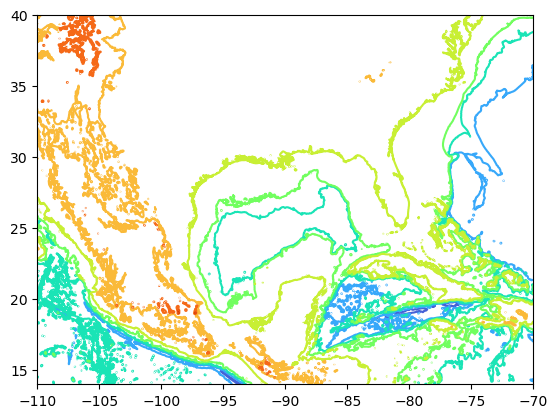

In [26]:
# A simple contour plot
plt.contour(xtopo, ytopo, ztopo, cmap='turbo');

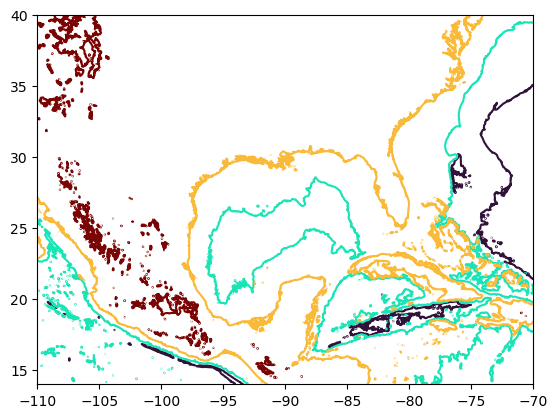

In [27]:
# Set levels
plt.contour(xtopo, ytopo, ztopo, [-5000, -2500, 0, 2500], cmap='turbo');

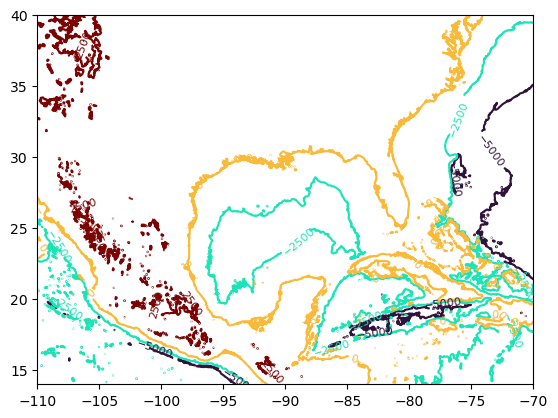

In [28]:
# Add contour labels
contours = plt.contour(xtopo, ytopo, ztopo, [-5000, -2500, 0, 2500], cmap='turbo')
plt.clabel(contours, inline=True, fontsize=8);

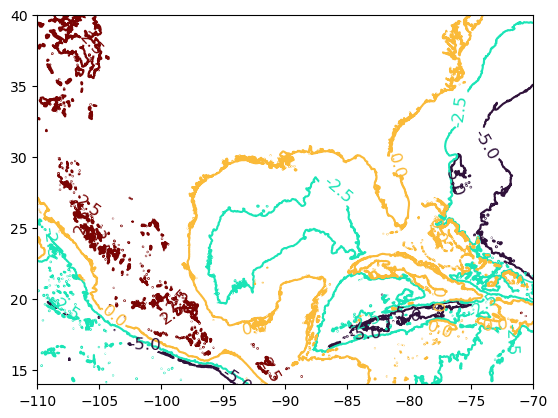

In [29]:
# What if we want kilometers?
ztopo = ztopo / 1000.0
contours=plt.contour(xtopo, ytopo, ztopo, [-5, -2.5, 0, 2.5], cmap='turbo') # note we rescaled the levels
plt.clabel(contours, inline=True, fontsize=12, fmt='%3.1f');

### Filled contours with contourf

`contourf` is the same idea as `contour`, but often makes better plots...

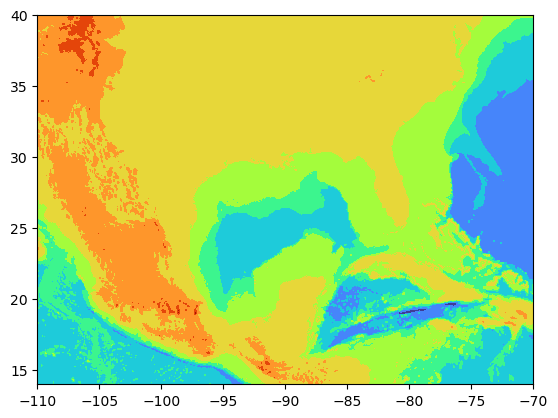

In [30]:
# The filled version
plt.contourf(xtopo, ytopo, ztopo, cmap='turbo');

### Change the colormap

Python has many built in colormaps, some better than others:
https://matplotlib.org/stable/tutorials/colors/colormaps.html

When plotting data, the choice of colormap can make a big difference! Often it's best to try out a few, while picking the right one for the problem (sequential, diverging, cyclic, etc).

For those who are interested in learning more, this is a great article describing the importance of color in conveying scientific results:
https://eos.org/features/visualizing-science-how-color-determines-what-we-see.

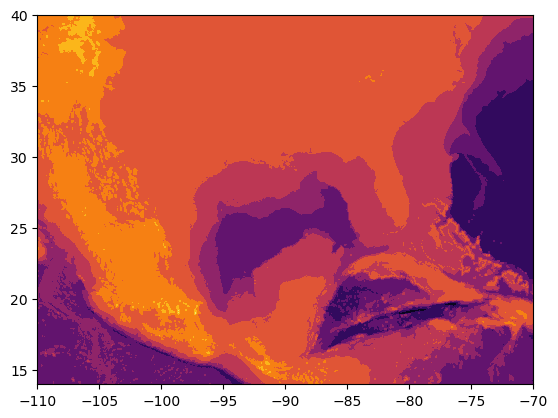

In [31]:
# 'inferno' is a sequential colormap, good for many problems (maybe not this one though)
plt.contourf(xtopo, ytopo, ztopo, cmap='inferno');

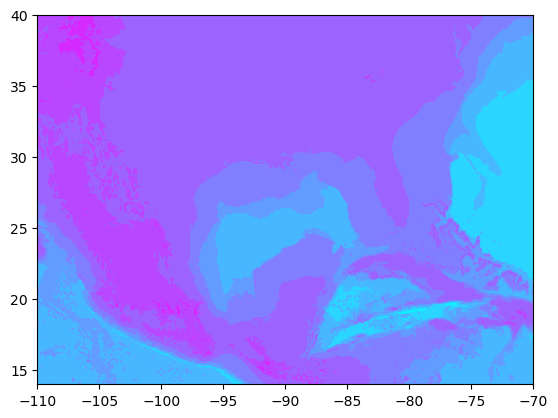

In [32]:
# 'cool' is sequential but not perceptually uniform
plt.contourf(xtopo, ytopo, ztopo, cmap='cool');

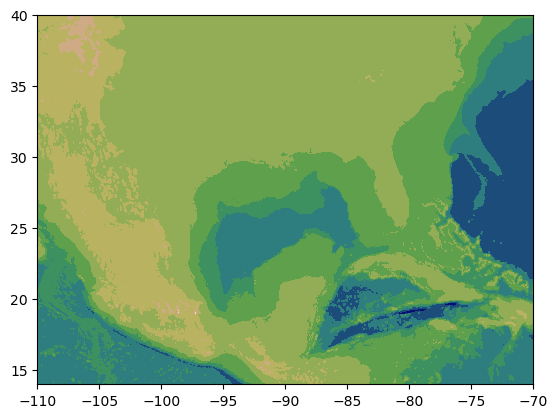

In [33]:
# 'gist_earth' is often used with topographic data
plt.contourf(xtopo, ytopo, ztopo, cmap='gist_earth');

### Add a colorbar

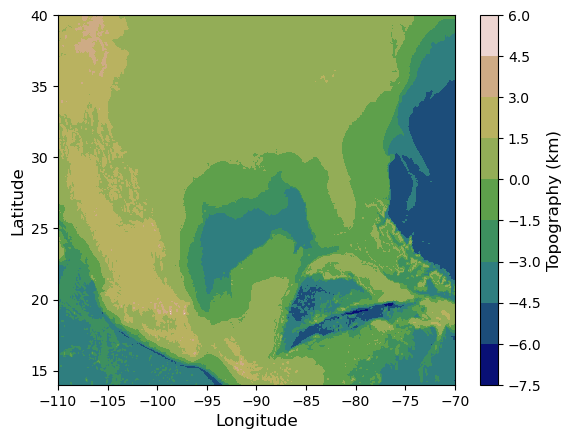

In [34]:
# Default colorbar
plt.contourf(xtopo, ytopo, ztopo, cmap='gist_earth')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
cb = plt.colorbar();
cb.set_label('Topography (km)', fontsize=12)

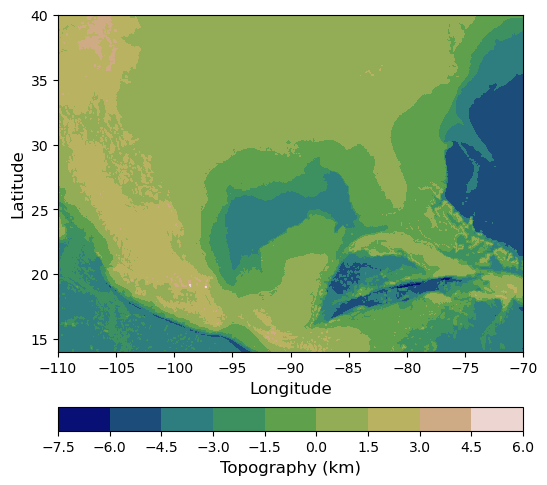

In [35]:
### Change the colorbar orientation and padding
plt.figure(figsize=(6,6))
plt.contourf(xtopo, ytopo, ztopo, cmap='gist_earth')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
cb = plt.colorbar(orientation='horizontal', pad=0.12);
cb.set_label('Topography (km)', fontsize=12)

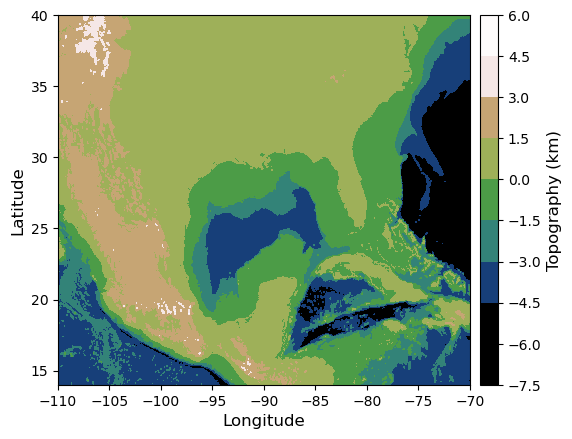

In [36]:
### Change the color limits
plt.contourf(xtopo, ytopo, ztopo, cmap='gist_earth',
            vmin=-5.0, vmax=4.0) # vmin and vmax are color limits
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
cb = plt.colorbar(pad=0.02);
cb.set_label('Topography (km)', fontsize=12)

### Plot continuous color steps using `imshow`

These plot arrays as images.

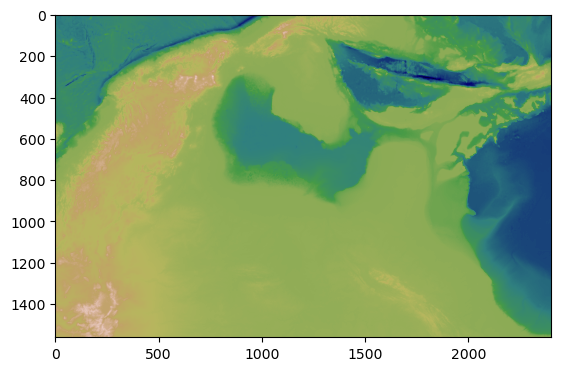

In [37]:
plt.imshow(ztopo, cmap='gist_earth'); # Hmm - this plotted upside down!

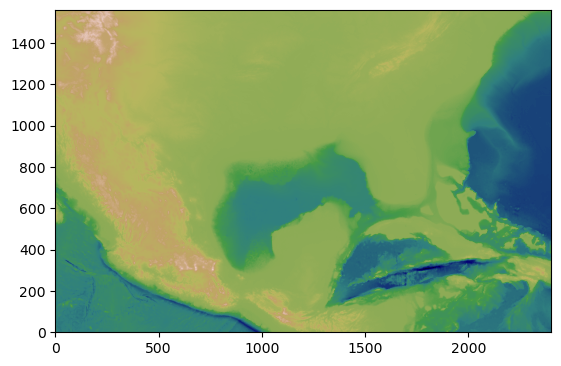

In [38]:
plt.imshow(ztopo, cmap='gist_earth', origin="lower"); # better!

#### Add correct axes labels using `extent=[xmin, xmax, ymin, ymax]`

Notice in the plot above, the x and y coordinates are pixels and not longitude and latitude values. The `origin=lower` moved the (0,0) position from the default top left to the bottom left.

But what if we don't want to have our image axes labeled in pixels? The `extent` command basically encodes the pixel bounds into units of your choice.

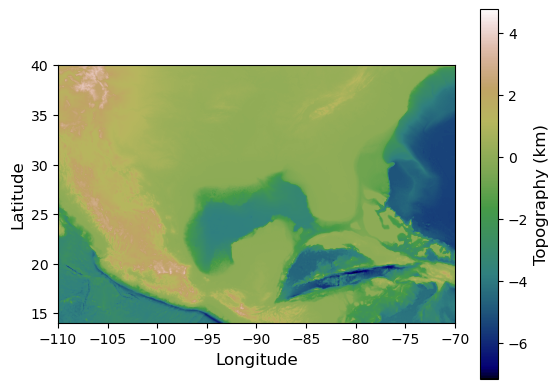

In [39]:
# first, determine extent of of the data
xmin = np.min(xtopo)
xmax = np.max(xtopo)
ymin = np.min(ytopo)
ymax = np.max(ytopo)

# next, plot the data and specify the extent
plt.imshow(ztopo,cmap='gist_earth', origin="lower",
           extent = [xmin, xmax, ymin, ymax], )
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# add colorbar
cb = plt.colorbar();
cb.set_label('Topography (km)', fontsize=12)

#### Default is 'square' pixels. You can override this with `aspect = 'auto'`, which uses the figure size and the `extent` to resize the pixels. 

**Note**: this is *not* the same thing as plotting to scale with a valid map projection.

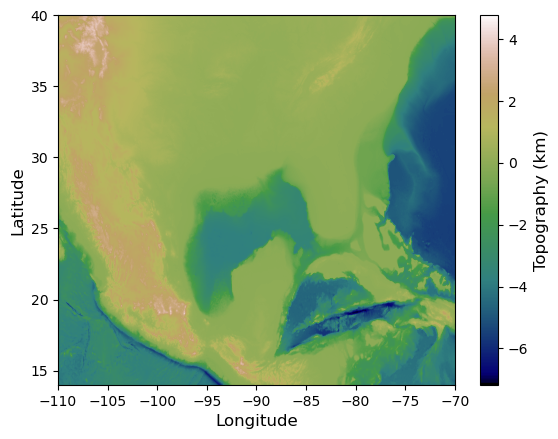

In [40]:
# redo aspect of each pixel
plt.imshow(ztopo,cmap='gist_earth', origin="lower",
           extent = [xmin, xmax, ymin, ymax], aspect='auto')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# add colorbar
cb = plt.colorbar();
cb.set_label('Topography (km)', fontsize=12)

### Importing arrays from a different format of netcdf file

The first netcdf file we looked at had three different arrays:
* `x` and `y` were 1D arrays that specified the x and y coordinates of the grid
* `z` was a 2D array that specified the topography at each grid point. (In general, `z` could be any type of data, not just topography).

This format is nice and easy to work with, but not the most efficient for storing a large dataset. There is a second kind of netcdf file that is a bit trickier but more efficient. We'll take a look at one of these below.


In [41]:
# import the data
topo_grid2 = netcdf_dataset('lecture13_topo_scotiasea.grd') 

In [42]:
# What are the arrays in the file?
topo_grid2.variables.keys()

dict_keys(['x_range', 'y_range', 'z_range', 'spacing', 'dimension', 'z'])

---

Here, we have a `z` array as before (though it turns out to be a flattened array). `x_range`, `y_range`, `spacing` and `dimension` are new but can be used to recreate the `x` and `y` arrays we are used to working with.

In [43]:
# Extract arrays
x_range2 = np.asarray(topo_grid2.variables['x_range'])
y_range2 = np.asarray(topo_grid2.variables['y_range'])
ztopo2 = np.asarray(topo_grid2.variables['z'])
dimension2 = np.asarray(topo_grid2.variables['dimension'])

In [44]:
# Take a look at these variables
print(x_range2, y_range2, dimension2)

[-81.      -14.34375] [-66.91628024 -48.52824681] [1896 1006]


In [45]:
# Make our x and y arrays
#   - note, for this data format we need to reverse the y data as follows
#    (the reason is a different convention for storing the z values)
nx2 = dimension2[0]
ny2 = dimension2[1]
xtopo2 = np.linspace(x_range2[0], x_range2[1], nx2)
ytopo2 = np.linspace(y_range2[1], y_range2[0], ny2) # note y needs to be reversed

In [46]:
# The z array is flat...
print(ztopo2.shape)

(1907376,)


In [47]:
# Reshape the z2 array
ztopo2 = ztopo2.reshape(ny2, nx2)
print(ztopo2.shape)

(1006, 1896)


#### Make some plots!

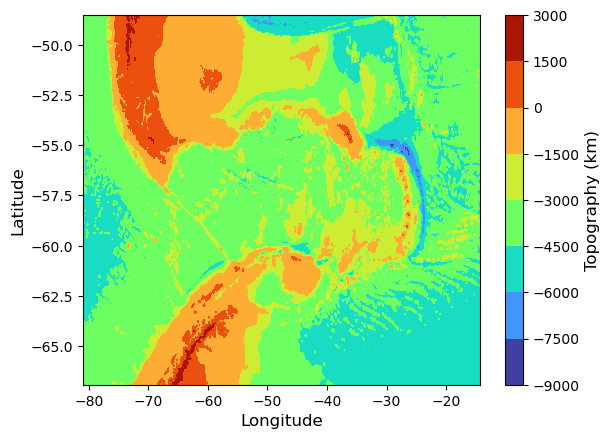

In [48]:
# Filled contour plot
plt.contourf(xtopo2, ytopo2, ztopo2, cmap='turbo')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
cb = plt.colorbar();
cb.set_label('Topography (km)', fontsize=12)

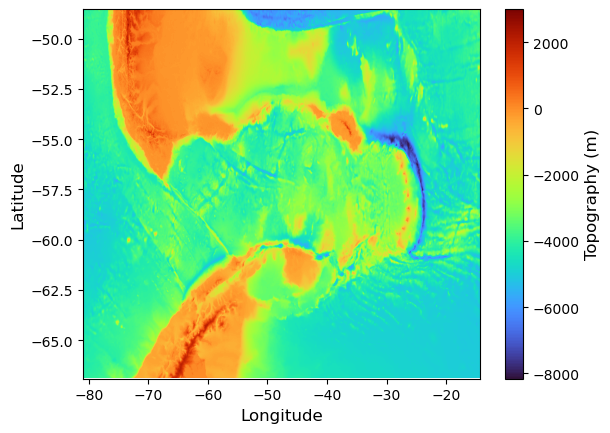

In [49]:
# An imshow plot (note we don't have to reset the origin for this one)
xmin2 = np.min(xtopo2)
xmax2 = np.max(xtopo2)
ymin2 = np.min(ytopo2)
ymax2 = np.max(ytopo2)
plt.imshow(ztopo2, cmap='turbo', aspect='auto',
           extent = [xmin2, xmax2, ymin2, ymax2],)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
cb = plt.colorbar();
cb.set_label('Topography (m)', fontsize=12)

# Summary
* Include errorbars to denote uncertainties in data
* Use `hist` to visualize distributions of data
* `pie` charts are useful for "fractional" data 
* Gridded data can be loaded with `netcdf4`
* netcdf data can have different formats, be sure to check which one you have
* For plotting gridded data, we can use: `contour`, `contourf`, `imshow` and more
* Spend some time picking out the right colormap for the problem
* Good figures take time!